<a href="https://colab.research.google.com/github/jcmachicao/deeplearning_gestionpublica/blob/main/gdmk__mod_edusuptec_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
ruta = 'drive/My Drive/00 data/'
os.listdir(ruta)

In [3]:
#data_archivo = 'bd_proyectos_piura.csv'
data_archivo = 'bd_titulos.xlsx'

In [4]:
#data = pd.read_csv(ruta + data_archivo, encoding="latin1")
data = pd.read_excel(ruta + data_archivo, sheet_name='Data')

In [5]:
data.to_pickle(ruta + 'bd_titulos.pkl')

In [ ]:
data.info()

In [7]:
data = data.astype({'institucion':'object', 'depar':'category', 'pub_priv':'category', 'tipo':'category', 'fam_prod':'category', 'carrera':'category', 'nivel':'category'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136062 entries, 0 to 136061
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CODIGO_MODULAR  136062 non-null  int64         
 1   institucion     136062 non-null  object        
 2   depar           136030 non-null  category      
 3   pub_priv        136062 non-null  category      
 4   tipo            136062 non-null  category      
 5   f_emision       136062 non-null  datetime64[ns]
 6   f_cod           136062 non-null  datetime64[ns]
 7   cod_titulo      136062 non-null  object        
 8   fam_prod        136062 non-null  category      
 9   carrera         136062 non-null  category      
 10  nivel           136062 non-null  category      
dtypes: category(6), datetime64[ns](2), int64(1), object(2)
memory usage: 6.1+ MB


In [ ]:
for col in data.columns:
  if data[col].dtype == 'category':
    print('*** ', col)
    print(data[col].value_counts())

In [35]:
from numpy import less_equal
outindex = []
for i, v in zip ( data.carrera.value_counts().index, data.carrera.value_counts() ):
  if less_equal(v, 50):
    outindex.append(i)

In [44]:
keepindex = list(data.carrera.unique())
keepindex2 = list( set(keepindex) - set(outindex) )

## data1XX: filtrado de valores

In [46]:
data100 = data[data.carrera.isin(keepindex2)]
data100.shape, data.shape

((134496, 11), (136062, 11))

In [78]:
data105 = data100.dropna(axis=0)

In [47]:
import plotly.express as px

In [80]:
data110 = data105[data105.nivel=='PROFESIONAL TÉCNICO']
data120 = data110[data110.tipo=='IEST']
data120.shape

(128474, 11)

In [81]:
data130 = data120.drop(['tipo', 'nivel', 'CODIGO_MODULAR', 'institucion', 'cod_titulo'], axis=1)
data130.shape

(128474, 6)

In [82]:
data130.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128474 entries, 0 to 136061
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   depar      128474 non-null  category      
 1   pub_priv   128474 non-null  category      
 2   f_emision  128474 non-null  datetime64[ns]
 3   f_cod      128474 non-null  datetime64[ns]
 4   fam_prod   128474 non-null  category      
 5   carrera    128474 non-null  category      
dtypes: category(4), datetime64[ns](2)
memory usage: 3.6 MB


In [89]:
data130['f_emision_dt'] = pd.to_datetime(data130.f_emision).dt.year * 12 + pd.to_datetime(data130.f_emision).dt.month
data130['f_cod_dt'] = pd.to_datetime(data130.f_cod).dt.year * 12 + pd.to_datetime(data130.f_cod).dt.month

In [103]:
data130['demora_otorga'] = np.abs(data130.f_cod_dt - data130.f_emision_dt)

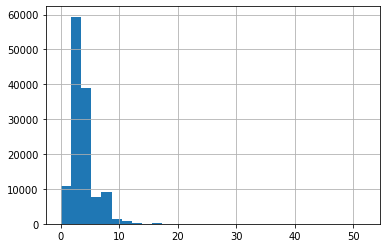

In [104]:
data130.demora_otorga.hist(bins=30)

In [105]:
data140 = data130.drop(['f_emision', 'f_emision_dt', 'f_cod', 'f_cod_dt'], axis=1)
data140.shape

(128474, 5)

In [106]:
px.parallel_categories(data140)

In [107]:
data140.columns

Index(['depar', 'pub_priv', 'fam_prod', 'carrera', 'demora_otorga'], dtype='object')

In [109]:
X_df = data140.drop('fam_prod', axis=1)
X_df_d = pd.get_dummies(X_df)

In [111]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_df_d, data140.fam_prod)

DecisionTreeClassifier(max_depth=5)

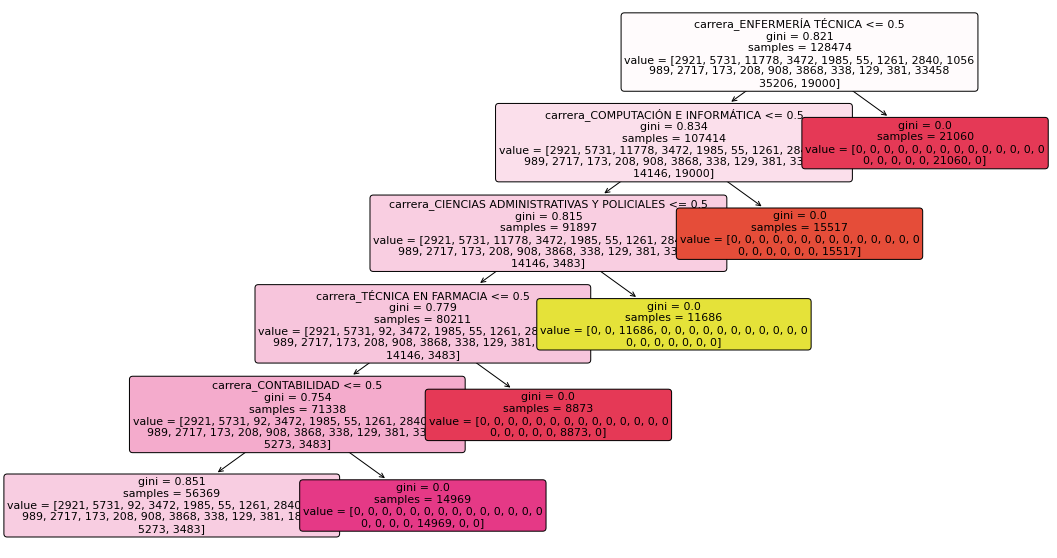

In [112]:
plt.figure(figsize=(18,10))
plot_tree(tree_model, max_depth=5, rounded=True, fontsize=11, label='all', filled=True, feature_names=X_df_d.columns)
plt.show()

In [119]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_np = mms.fit_transform(X_df_d)
y_np = pd.get_dummies(data140.fam_prod)
X_np.shape, y_np.shape, X_np.max()

((128474, 227), (128474, 25), 1.0)

In [120]:
rutaout = 'drive/My Drive/00 Modelos Principales/modelos gestion publica/'
np.save(rutaout+'X_np.npy', X_np)
np.save(rutaout+'y_np.npy', y_np)